## Задание 1
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

 Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats

plt.style.use('seaborn-whitegrid')

In [2]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

### Расчет с использованием intercept

In [3]:
x = zp
y = ks

Коэффициенты уравнения парной линейной регрессии можно найти следующим образом:

$$b = \frac{\overline{yx} - \overline{y} \cdot {\overline{x}}}{\overline{x^2} - (\overline{x})^2}; a = \overline{y} - b \cdot {\overline{x}}.$$

$a$ - intercept значение пересечения линии с осью $Y$

$b$ - slope задаёт наклон линии регрессии

In [4]:
b = ((x * y).mean() - x.mean() * y.mean()) / ((x ** 2).mean() - x.mean() ** 2)
print(f'b slope = {b}')

b slope = 2.620538882402765


In [5]:
a = ks.mean() - b * zp.mean()
print(f'a intercept = {a}')

a intercept = 444.1773573243596


Составим уравнение регрессии (коэффициенты округлены до сотых):

$$y = 444.18 + 2.62 \cdot x$$

Визуализация scatter plot прогнозного значения скоринга для зарплаты и отметим прямую линейной регрессии::

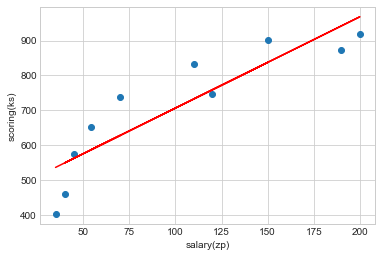

In [6]:
f = lambda x: a + b * x
y_pred = f(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.xlabel('salary(zp)')
plt.ylabel('scoring(ks)')
plt.show()

Найдем коэффициент детерминации $R^2$:

$$R^{2} = {(r}_{\mathit{XY}})^{2} ∈ [0;1]$$

In [7]:
r_xy = stats.pearsonr(x, y)[0]
print(f'Коэффициент корреляции = {r_xy}')
R2 = r_xy ** 2
print(f'Коэффициент детерминации = {R2}')

Коэффициент корреляции = 0.8874900920739162
Коэффициент детерминации = 0.7876386635293682


Качество модели оценим с помощью средней ошибки аппроксимации:
$\overline{A} = \frac{1}{n} \sum_{i=1}^n \bigg|\frac{y_i - z_i}{y_i}\bigg|$

In [8]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
print('A =', A_mean)

A = 11.46925184356171


Для оценки значимости уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение $F -$ критерия $F_{fact}$):

$$F_{fact} = \frac{R^2}{1 - R^2} \cdot \frac{n-k-1}{k} > F_{crit},$$
где:
* $R^2$ – коэффициент детерминации,
* $n$ – число наблюдений,
* $k$ – число факторов,
* $F_{crit}$ – критическое значение.

In [9]:
n = y.shape[0]
k1 = 1
k2 = n - k1 - 1
F_fact = (R2 / (1 - R2)) * (k2 / k1)
print('F_fact =', F_fact)

F_fact = 29.671640859664432


In [10]:
p = 0.95
alpha = 1 - p
F_crit = stats.f.ppf(1 - alpha, k1, k2)
print('F_crit =', F_crit)

F_crit = 5.317655071578714


Так как $F_{fact} = 29.67 > F_{crit} = 5.31$, уравнение регрессии статистически значимо.

### Расчет без использования intercept

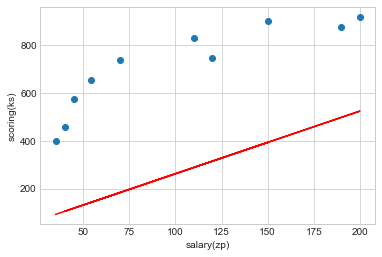

In [11]:
a = 0
f = lambda x: a + b * x
y_pred = f(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='r')
plt.xlabel('salary(zp)')
plt.ylabel('scoring(ks)')
plt.show()

In [12]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
print('A =', A_mean)

A = 65.2875936982184


Заметно, что качество модели стало значительно хуже

Еще раз проверимся:

[$W = (X^T \cdot X)^{-1} \cdot X^T \cdot y$](https://habr.com/ru/post/659415/)

In [13]:
X_train = np.vstack((np.ones((1, n)), x)).T
w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y

print(f'Коэффициенты {w}')

Коэффициенты [444.17735732   2.62053888]


## Задание 2*
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

Еще раз запишем уравнение ЛР, с которым будем работать:

$y = a + b \cdot x$

Функция потерь:

$\text{MSE}=\frac{\sum _{i=0}^n (y_i-y){}^2}{n} = \frac{\sum _{i=0}^n (-a x-b+y_i){}^2}{n}$

Найдем ч.п. -

$\frac{\partial \text{MSE}}{\partial b} = \frac{\sum _{i=0}^n \left(2 b x^2+2 a x-2 x y_i\right)}{n}$;

$\frac{\partial \text{MSE}}{\partial a} = \frac{\sum _{i=0}^n (2 b x+2 a-2 y_i)}{n}$

Напищем класс, котороый будет считать регрессию градиентным спуском:

In [14]:
class GradientLinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.X, self.y = None, None
        self.n_samples, self.n_features = None, None
        self.a, self.b = 0, 0
        self.loss, self.losses = 0, []

    def fit(self, X, y, learn_rate=0.01, max_iter=100):
        self.X, self.y = X, y
        self.n_samples, self.n_features = self.X.shape
        self.b = np.zeros(shape=(self.n_features, 1))

        for i in range(max_iter):
            y_pred = self._predict()

            self._calc_losses(y_pred)
            self._show_answer(i)

            grad_b = self._calc_gradient(y_pred)[0]
            grad_a = self._calc_gradient(y_pred)[1]

            self.b = self.b - learn_rate * grad_b
            self.a = self.a - learn_rate * grad_a

        return self.b, self.a, self.losses

    def _predict(self):
        y_p = self.X @ self.b + self.a
        return y_p

    def _show_answer(self, i):
        if i % 100000 == 0:
            if self.fit_intercept:
                print(f"iteration: {i},"
                      f" b: {self.b[0][0]},"
                      f" a:{self.a},"
                      f" mse: {self.losses[i]}")
            else:
                print(f"iteration: {i},"
                      f" b: {self.b[0][0]},"
                      f" mse: {self.losses[i]}")

    def _calc_gradient(self, y_pred):
        grad_b = (2 / self.n_samples) * np.sum((self.X.T @ (y_pred - self.y)))
        grad_a = (2 / self.n_samples) * np.sum((y_pred - self.y)) if self.fit_intercept else 0
        return grad_b, grad_a

    def _calc_losses(self, y_pred):
        self.loss = (1 / self.n_samples) * np.sum((y_pred - self.y) ** 2)
        return self.losses.append(self.loss)

Чтобы получить ответ, осталось написать функцию и вызвать её

In [15]:
def run_glr(X, y):
    '''
    Градиентный спуск (без intercept)
    '''
    glr = GradientLinearRegression(fit_intercept=False)
    glr.fit(X[:, np.newaxis], y[:, np.newaxis], learn_rate=1.e-5, max_iter=100001)

In [16]:
X = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)

In [17]:
run_glr(X, y)

iteration: 0, b: 0.0, mse: 534426.9
iteration: 100000, b: 5.889820420132688, mse: 56516.858415719405


## Задание 3*

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

Класс уже написан во 2 задании, добавим пару ф-ий:

In [18]:
def run_intercept_glr(X, y):
    '''
    Градиентный спуск (с intercept)
    '''
    glr = GradientLinearRegression(fit_intercept=True)
    glr.fit(X[:, np.newaxis], y[:, np.newaxis], learn_rate=1.e-5, max_iter=900001)

In [19]:
run_intercept_glr(X, y)

iteration: 0, b: 0.0, a:0, mse: 534426.9
iteration: 100000, b: 4.5888727556525994, a:176.75675408938184, mse: 24610.95054647255
iteration: 200000, b: 3.8057060229667785, a:283.1588858286581, mse: 13047.171181713313
iteration: 300000, b: 3.3341480775509242, a:347.2254102822301, mse: 8854.783194337844
iteration: 400000, b: 3.0502150571553828, a:385.80094902817507, mse: 7334.854762440256
iteration: 500000, b: 2.879254179802643, a:409.0279338261184, mse: 6783.81262486905
iteration: 600000, b: 2.7763157419115196, a:423.0132945065502, mse: 6584.035167584433
iteration: 700000, b: 2.71433476614946, a:431.43411688462385, mse: 6511.606890837752
iteration: 800000, b: 2.677014971570133, a:436.50443656699116, mse: 6485.348396291911
iteration: 900000, b: 2.6545440915892606, a:439.5573618665921, mse: 6475.82851584208
